In [1]:
import numpy as np
import scipy as sp
import scipy.sparse as sparse
import scipy.sparse.linalg as sla
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
n = 64
A = sparse.diags([-1, 2, -1], [-1, 0, 1], shape=(n,n), format='csr')
b = np.zeros((n,))

In [3]:
I = sparse.eye(n, format='csr')
Dinv = 0.5 * I
D = 2 * I
E = -sparse.tril(A, -1)

In [4]:
rnorm = []

test = 'smooth'
if test == 'random':
    u = np.random.rand(n)
elif test == 'smooth':
    n = A.shape[0]
    u = np.sin(np.pi * np.arange(1, n+1)/ (n+1))
    
uinit = u.copy()

for i in range(100):
    u[:] = u - Dinv * A * u
    #u[:] = u - sla.(D-E, A*u)
    rnorm.append(np.linalg.norm(A * u))

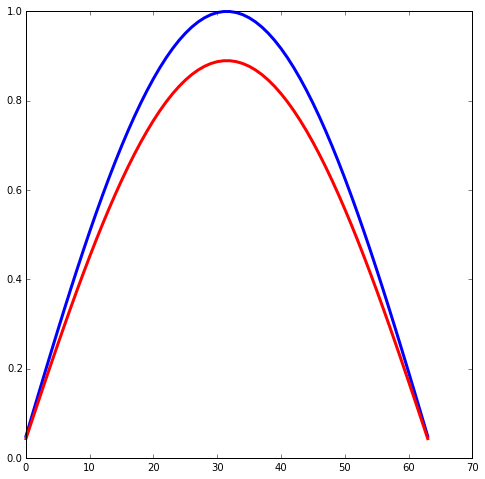

In [5]:
plt.figure(figsize=(8,8))
plt.plot(uinit, 'b-', lw=3, clip_on=False)
plt.plot(u, 'r-', lw=3, clip_on=False)

# Try specific $\omega$-Jacobi

In [6]:
omega = 2.0 / 3.0
rnorm = []

test = 'smooth'
if test == 'random':
    u = np.random.rand(n)
elif test == 'smooth':
    n = A.shape[0]
    u = np.sin(np.pi * np.arange(1, n+1)/ (n+1))
    
uinit = u.copy()

for i in range(100):
    u[:] = u - omega * Dinv * A * u
    #u[:] = u - sla.(D-E, A*u)
    rnorm.append(np.linalg.norm(A * u))

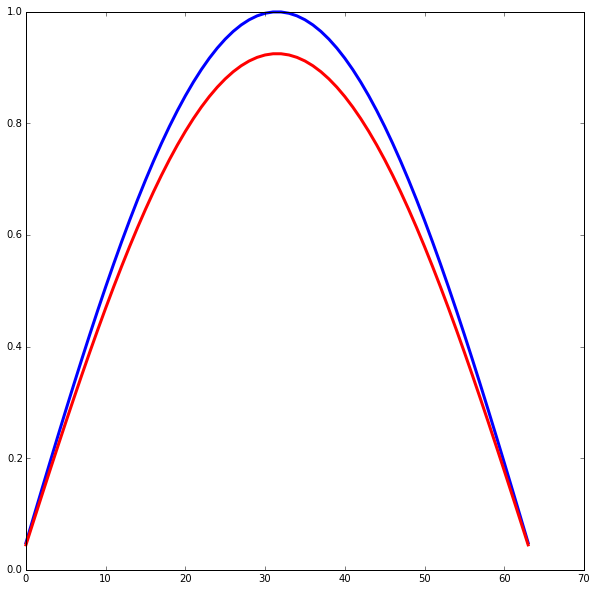

In [7]:
plt.figure(figsize=(10,10))
plt.plot(uinit, 'b-', lw=3, clip_on=False)
plt.plot(u, 'r-', lw=3, clip_on=False)

# Try different "modes"

In [8]:
omega = 2.0 / 3.0

rnorm1 = []
rnorm3 = []
rnorm6 = []

u1 = np.sin(np.pi * np.arange(1, n+1)/ (n+1))
u3 = np.sin(3 * np.pi * np.arange(1, n+1)/ (n+1))
u6 = np.sin(6 * np.pi * np.arange(1, n+1)/ (n+1))
    
for i in range(100):
    u = u1
    u[:] = u - omega * Dinv * A * u
    rnorm1.append(np.linalg.norm(A * u))
    
    u = u3
    u[:] = u - omega * Dinv * A * u
    rnorm3.append(np.linalg.norm(A * u))
    
    u = u6
    u[:] = u - omega * Dinv * A * u
    rnorm6.append(np.linalg.norm(A * u))

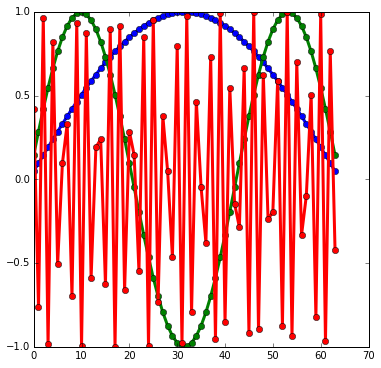

In [9]:
u1 = np.sin(np.pi * np.arange(1, n+1)/ (n+1))
u3 = np.sin(3 * np.pi * np.arange(1, n+1)/ (n+1))
u56 = np.sin(56 * np.pi * np.arange(1, n+1)/ (n+1))
plt.figure(figsize=(6,6))
plt.plot(u1, '-o', lw=3)
plt.plot(u3,  '-o',lw=3)
plt.plot(u56, '-o', lw=3)

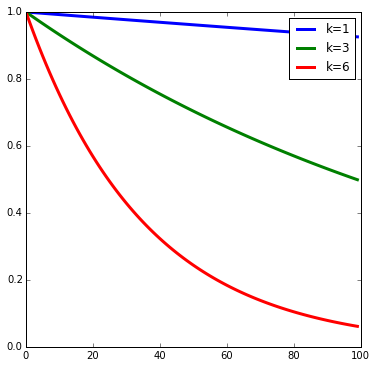

In [10]:
plt.figure(figsize=(6,6))
for rnorm, label in zip([rnorm1, rnorm3, rnorm6], ['k=1', 'k=3', 'k=6']):
    rnorm = np.array(rnorm) / rnorm[0]
    plt.plot(rnorm, lw=3, label=label)
plt.legend()

# Test many "modes"

In [11]:
omega = 2.0 / 3.0

rnorm = []
u1 = np.sin(np.pi * np.arange(1, n+1)/ (n+1))
u6 = np.sin(6 * np.pi * np.arange(1, n+1)/ (n+1))
u32 = np.sin(32 * np.pi * np.arange(1, n+1)/ (n+1))
u = (u1 + u6 + u32) / 3.0

for i in range(100):
    u[:] = u - omega * Dinv * A * u
    rnorm.append(np.linalg.norm(A * u))

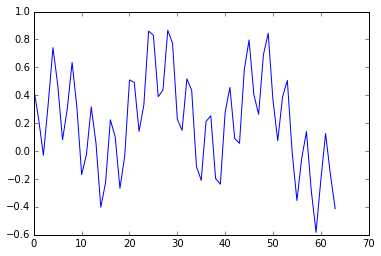

In [12]:
plt.plot((u1 + u6 + u32) / 3.0)

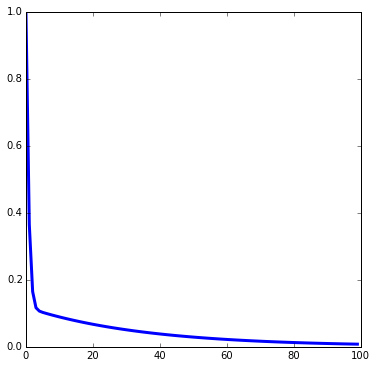

In [13]:
plt.figure(figsize=(6,6))
rnorm = np.array(rnorm) / rnorm[0]
plt.plot(rnorm, lw=3)

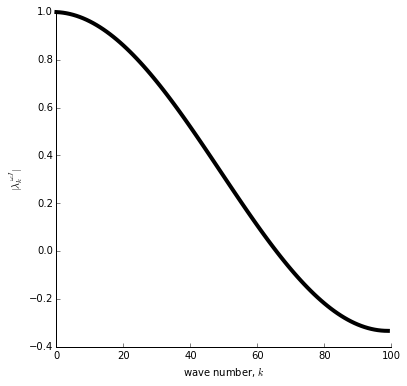

In [14]:
K = np.arange(1,101)
lmbda = 1 - (4.0/3.0) * np.sin(np.pi * K/ (2*100))**2

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.hold(True)
ax.plot(lmbda,'-k',label='residual',linewidth=4,clip_on=False)

plt.axis('auto')
plt.ylabel(r'$|\lambda^{\omega J}_k|$')
plt.xlabel(r'wave number, $k$')
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.get_xaxis().tick_bottom()   # remove unneeded ticks 
ax.get_yaxis().tick_left()
f = 'fig_wjacobi_conv.pdf'
plt.savefig(f,bbox_inches='tight')
plt.show()